<a href="https://colab.research.google.com/github/kauercurtis/CS-325-Algorithms/blob/main/CS_325_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```
< Curtis Kauer >
< kauerc@oregonstate.edu >
Programming Exercise 2
CS 325 Algorithms Spring 2023
```

# Part I: Implement the brute-force 0/1 Knapsack problem

Complete the brute force implementation of the 0/1 Knapsack problem.

In [ ]:
#max - helper function that determines the greater value
#param1 - value1 - the value to compare to value2
#param2 - value2 - the value to compare to value1
#return - returns the greatest value
def max(value1, value2):
  if value1 > value2:
    return value1;
  return value2;

#pack - Returns the maximum value that can be put in a knapsack of capacity W
#param1 - W - max capacity
#param2 - weights - a list of the weights parallel to the list of values
#param3 - values - a list of values parallel to the list of weights
#param4 - n - the size of both lists
#param5 - the starting index to recursively attempt every combination in relation to
#uses max() helper function
def pack(W, weights, values, n, index):
#base case
  if index == n or W <= 0:
    return 0;
#if the weight of current item is less than or equal to max capacity
#vInclude = included item in maximum benefit
#vExclude = excluded item from maximum benefit
  if weights[index] <= W:
    vInclude = pack(W - weights[index], weights, values, n, index + 1) + values[index];
    vExclude = pack(W, weights, values, n, index + 1);
    return max(vInclude, vExclude);
  else:
#else the item is excluded for being more than the max capacity
    vExclude = pack(W, weights, values, n, index + 1);
    return vExclude;

#Wrapper function for pack()
# Returns the maximum value that can be put in a knapsack of capacity W
def knapsack_bf(W, weights, values, n):
  # your code here
  return pack(W, weights, values, n, 0);

# Brute Force Test 1

In [ ]:
import time
values  = [50, 100, 150]  # values
weights = [10, 20, 30]    # weights
W = 50   # weight capacity
n = len(values)
t = time.process_time()
result = knapsack_bf(W , weights , values , n)
print(result);
assert result == 250, 'Failed Brute Force Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

250
Passed BF Test 1 with 250 in 0.00139 seconds


#Brute Force Test 2

In [ ]:
import time
values  = [1, 3, 7, 11, 14, 17, 20, 25, 37, 42, 50]      # values
weights = [1, 4, 6, 3, 15, 3, 42, 7, 9, 10, 72]    # weights
W = 1500  # weight capacity
n = len(values)
t = time.process_time()
result = knapsack_bf(W , weights , values , n)
assert result == 227, 'Failed Brute Force Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed BF Test 1 with 227 in 0.00185 seconds




---


# Part II: Implement dynamic-programming 0/1 Knapsack problem

Complete the dynamic programming implementation of the 0/1 Knapsack problem.

In [ ]:
# Returns the maximum value that can be put in a knapsack of capacity W
#param1 - W - max capacity
#param2 - weights - a list of the weights parallel to the list of values
#param3 - values - a list of values parallel to the list of weights
#param4 - n - the size of both lists
#uses max() helper function
def knapsack_dp(W, weights, values, n):
  # your code here
  #new multidimensional list
  table = [[0 for foo in range(W + 1)] for bar in range(n + 1)]

#traverse the list by row
  for index in range(n + 1):
#traverse the list by each column in the row
    for currentWeight in range(W + 1):
      if index == 0 or currentWeight == 0:
        table[index][currentWeight] = 0
      elif weights[index - 1] <= currentWeight:
        table[index][currentWeight] = max(values[index - 1] + table[index - 1][currentWeight - weights[index - 1]], table[index - 1][currentWeight]);
      else:
        table[index][currentWeight] = table[index - 1][currentWeight]
#max value is the last value in the multidimensional array
  return table[n][W]


#Dynamic Programming Test 1

In [ ]:
import time
values  = [50, 100, 150]  # values
weights = [10, 20, 30]    # weights
W = 50   # weight capacity
n = len(values)
t = time.process_time()
result = knapsack_dp(W , weights , values , n)
assert result == 250, 'Failed Dynamic Programming Test 1'
print('Passed BF Test 1 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed BF Test 1 with 250 in 0.00048 seconds


#Dynamic Programming Test 2

In [ ]:
import time
values  = [1, 3, 7, 11, 14, 17, 20, 25, 37, 42, 50]      # values
weights = [1, 4, 6, 3, 15, 3, 42, 7, 9, 10, 72]    # weights
W = 1500  # weight capacity
t = time.process_time()
result = knapsack_dp(W , weights , values , len(values))
assert result == 227, 'Failed Dynamic Programming Test 2'
print('Passed DP Test 2 with', result, 'in', '{:.5f}'.format(time.process_time()-t), 'seconds')

Passed DP Test 2 with 227 in 0.01343 seconds




---


#Part III: Graph the Runtime

Run this code below after completeing your **brute force** and **dynamic programming** implementations of the 0/1 Knapsack problem.

You do not need to write code. Please answer the brief questions below the block.

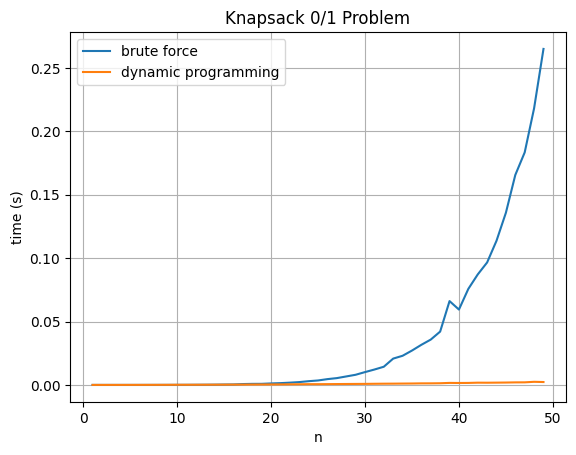

In [ ]:
import time
import matplotlib.pyplot as plt
import random

# you can play with these constants to change the nature of the data.
value_step_size = 5
weight_step_size = 3
capacity_scalar = 3

# function that runs a set of functions, times their output, and
#    graphs time vs input size
def time_algorithms(fs, fnames):
  if len(fs)!=len(fnames):
    print("Error: functions and name lists must be the same size!")
    return;
  fcount = 0
  fig, ax1 = plt.subplots()
  ax1.set_title('Knapsack 0/1 Problem')
  ax1.set_xlabel('n')
  ax1.set_ylabel('time (s)')
  for f in fs:
    # randomly generates input data of different sizes
    elements = list()
    times = list()
    for i in range(1, 50):

        # generate some data
        values = list(range(0,5*i,value_step_size))
        weights = list(range(1,5*i,weight_step_size))
        #random.shuffle(weights)
        n = len(values)
        W = capacity_scalar * i;

        # run the algorithm and time it
        start = time.perf_counter()
        f(W, weights, values, n)
        end = time.perf_counter()

        # save results for graphing
        elements.append(n)
        times.append(end-start)

    # graph the complexity
    ax1.plot(elements, times, label = fnames[fcount])
    fcount = fcount + 1

  ax1.grid()
  ax1.legend()
  fig.show()


# run the graph to plot BF vs DP.
fs = [knapsack_bf, knapsack_dp]
fnames = ['brute force', 'dynamic programming']
time_algorithms(fs, fnames)





---


#Analysis

**Analysis Question 1: Brute Force**

*What is the complexity (big-O) of the brute force approach?  Explain/show/derive how you arrived at this conclusion. Justify your answer (in words and math) for full credit.*

The time complexity of the brute force I wrote is O(2^n). This is because brute force mentality is to attempt every possible combination of values.
Considering that there are 2 outcomes for every value in a set. Its either in or its out.

let S = {item1, item2, ...., itemN} = 2 * 2 * 2 * ..... 2^n

This means that there are a total of 2^n possible combinations that the algorithm has to iterate through until reaching its base case.

**Analysis Question 2: Dynamic Programming**

*What is the complexity (big-O) of the dynamic programming approach?  Explain/show/derive how you arrived at this conclusion. Justify your answer (in words and
math) for full credit.*

The time complexity of the dynamic programming approach is O(n * W). This is because the algorithm traverses through a multi dimensional list that has an area of n * maxCapacity.
Taking the syntax of the nested for loops from the written function,

for index in range(n + 1): = O(n)  
for currentWeight in range(W + 1): = O(W)

= O(n * W)